### Polynomial Regression

A table that shows the general form of polynomials up to the 4th degree:

| Degree | Polynomial | Coefficients |
|--------|------------|--------------|
| 0      | $c$        | $w_0$        |
| 1      | $ax + b$   | $w_1x + w_0$   |
| 2      | $ax^2 + bx + c$ | $w_2x^2 + w_1x + w_0$ |
| 3      | $ax^3 + bx^2 + cx + d$ | $w_3x^3 + w_2x^2 + w_1x + w_0$ |
| 4      | $ax^4 + bx^3 + cx^2 + dx + e$ | $w_4x^4 + w_3x^3 + w_2x^2 + w_1x + w_0$ |

In this table, `a`, `b`, `c`, `d`, and `e` are coefficients that can take on any real value, and `c` is a constant term. The degree of a polynomial is the highest power of the variable that appears in the polynomial. For example, the polynomial $ax^3 + bx^2 + cx + d$ has degree 3 because the highest power of $x$ that appears is 3. 

### Data Generation

In [1]:
import numpy as np
from typing import List


def polynomial(x: np.ndarray, w: np.ndarray) -> np.ndarray:
    """
    Evaluates a polynomial with the given coefficients at the given value of x.

    Args:
        x: The value of x at which to evaluate the polynomial.
        w: A list of coefficients for the polynomial, where w[0] corresponds to the
           coefficient of the highest-degree term, w[1] corresponds to the coefficient
           of the second-highest-degree term, and so on.

    Returns:
        The value of the polynomial at x.
    """
    degree = len(w) - 1
    y = 0
    for i in range(degree + 1):
        y += w[i] * x**(degree - i)
    return y



In this code, the `polynomial()` function takes an array of coefficients `w` as input, where `w[0]` corresponds to the coefficient of the cubic term, `w[1]` corresponds to the coefficient of the quadratic term, and so on. The `w_true` array contains the true coefficients of the cubic function, which are used to generate the synthetic data. 

In [2]:
# Generate synthetic data
np.random.seed(0)
x = np.sort(np.random.rand(100))
w_true = np.array([0, 1, -2, 1])  # polynomial coefficients (from lowest to highest degree), definning a cubic polynomial
y = polynomial(x, w_true) + np.random.randn(100)*0.05  # polynomial relationship with some noise

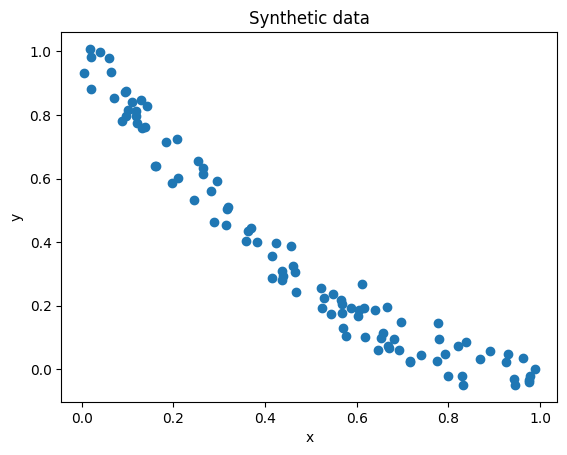

In [3]:
# plot y vs x
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic data')
plt.show()


#### Polynomial Regression with NumPy

np.polyfit(x, y, 3) is used to compute the coefficients of the polynomial of degree 3 that fits the data in the least squares sense. np.poly1d(coeffs) is then used to create a one-dimensional polynomial class using these coefficients. We can evaluate this polynomial at the points in x using poly(x), and we plot this on top of the scatter plot of the original data.

Note: This code fits a polynomial of the form y = ax^3 + bx^2 + cx + d. The coefficients a, b, c, and d are determined such that the sum of the squared differences between the actual y values and the predicted y values (from the polynomial) is minimized. This is known as the method of least squares.

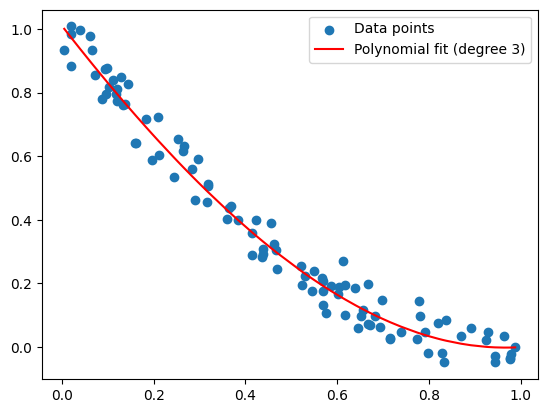

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fit a polynomial of degree 3
coeffs = np.polyfit(x, y, 3)
poly = np.poly1d(coeffs)

# Plot the data and the polynomial fit
plt.scatter(x, y, label='Data points')
plt.plot(x, poly(x), color='red', label='Polynomial fit (degree 3)')
plt.legend()
plt.show()


In [5]:

def create_polynomial_models(X: np.ndarray, y: np.ndarray, degrees: List[int]) -> dict[int, np.poly1d]:
    """
    Creates polynomial models for the given degrees and fits them to the given data.

    Args
        X: The x values of the data.
        y: The y values of the data.
        degrees: A list of polynomial degrees to try.

    Returns:
        A dictionary of polynomial models, with the polynomial degree as the key.
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline

    models = {}
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, y)
        models[degree] = model
    return models

In [10]:
degrees = list(range(0, 6))
models = create_polynomial_models(x.reshape(-1, 1), y, degrees)

In [15]:
# print model
for degree, model in models.items():
    print(f'Model for polynomial of degree {degree}:')
    print(model)
    print()
    # print coefficients
    print(f'Coefficients: {model[1].coef_}')
    print()
    # print intercept
    print(f'Intercept: {model[1].intercept_}')
    print()


Model for polynomial of degree 0:
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=0)),
                ('linearregression', LinearRegression())])

Coefficients: [0.]

Intercept: 0.37068086831420144

Model for polynomial of degree 1:
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

Coefficients: [ 0.         -1.06819706]

Intercept: 0.8757178558660608

Model for polynomial of degree 2:
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Coefficients: [ 0.         -2.00850607  0.9740087 ]

Intercept: 1.0216086154425876

Model for polynomial of degree 3:
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

Coefficients: [ 0.         -1.85367666  0.58905749  0.25454234]

Intercept: 1.0091228868022482

Model for polynomial of degree 4:
Pipeline(steps

In [16]:
def plot_multiple_models(X, y, models):
    # Calculate the number of rows and columns for the subplots
    X_continuous = np.linspace(min(X), max(X), 100)
    n_plots = len(models)
    n_cols = int(np.ceil(np.sqrt(n_plots)))
    n_rows = int(np.ceil(n_plots / n_cols))
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6, 6))
    fig.tight_layout(pad=3.0)
    axs = axs.flatten()
    for i, (name, model) in enumerate(models.items()):
        axs[i].scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
        axs[i].plot(X_continuous, model.predict(X_continuous), label=f"Model={name}", linewidth=2)
        axs[i].set_xlabel("data")
        axs[i].set_ylabel("target")
        axs[i].set_title(f"Model={name}")
    plt.show()

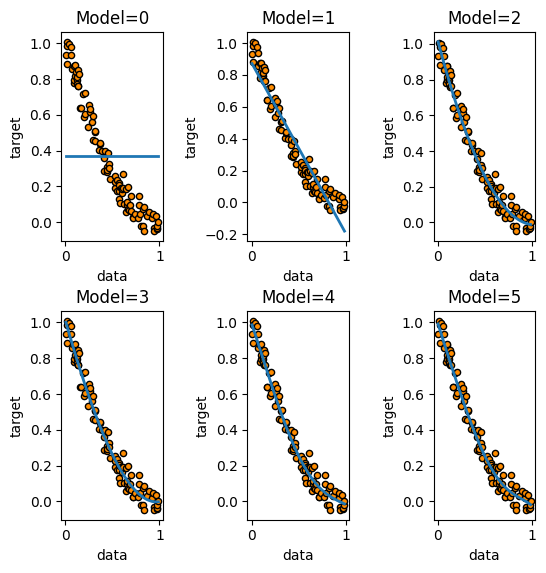

In [18]:
plot_multiple_models(x.reshape(-1,1), y, models)

#### Polynomial Regression with Scikit-Learn

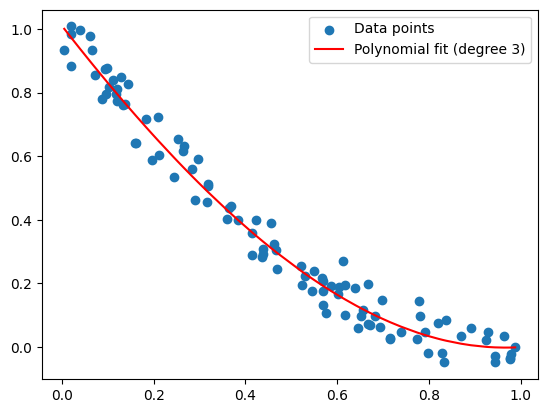

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Reshape x to be a 2D array of size (n_samples, n_features)
X = x[:, np.newaxis]

# Create a pipeline that first creates polynomial features and then fits a linear regression model
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X, y)

# Predict y-values for the original x-values
yfit = model.predict(X)

# Plot the data and the polynomial fit
plt.scatter(x, y, label='Data points')
plt.plot(x, yfit, color='red', label='Polynomial fit (degree 3)')
plt.legend()
plt.show()


#### Polynomial Regression Using Scipy

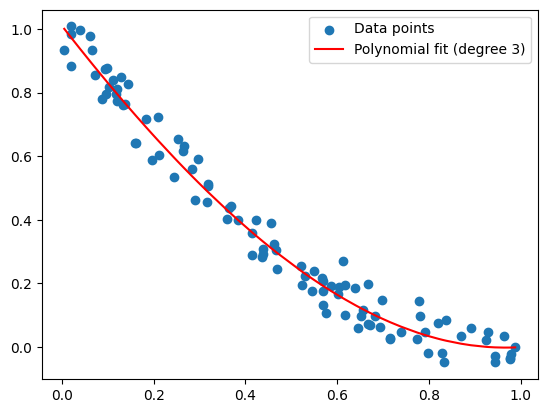

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the form of the function you want to fit
def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the function to your data
popt, pcov = curve_fit(func, x, y)

# Generate y-values for the fitted function
yfit = func(x, *popt)

# Plot the data and the fitted function
plt.scatter(x, y, label='Data points')
plt.plot(x, yfit, color='red', label='Polynomial fit (degree 3)')
plt.legend()
plt.show()


## Exponential Regression

### non-linear regression using scipy 

[2.80720814 1.24568448 0.44517316]


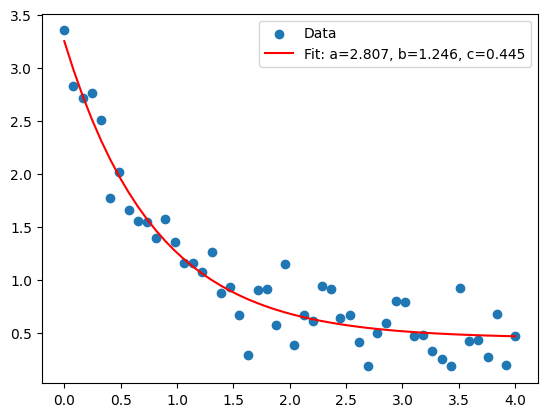

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the form of the function we want to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate some fake data to represent your real data
np.random.seed(0)
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

# Fit the function to the data
popt, pcov = curve_fit(func, xdata, ydata)

# Print the optimal parameters
print(popt)

# Plot the actual data
plt.scatter(xdata, ydata, label='Data')

# Plot the fit
plt.plot(xdata, func(xdata, *popt), 'r-', label='Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.legend()
plt.show()


### scikit-learn for non-linear data

a: 1.7367269445704676
b: -0.7359318444674985


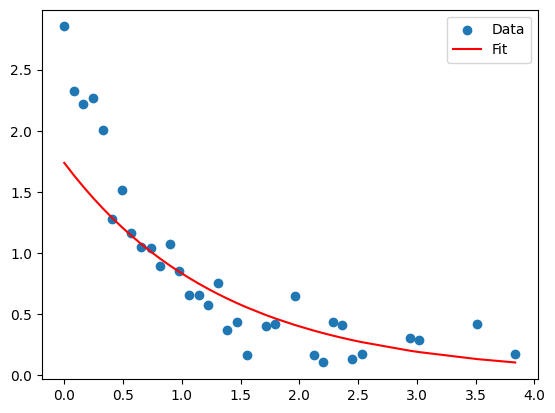

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some fake data to represent your real data
np.random.seed(0)
xdata = np.linspace(0, 4, 50)
y = 2.5 * np.exp(-1.3 * xdata) 
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

# Remove any data points where ydata <= 0.1 to avoid NaN issues
xdata = xdata[ydata > 0.1]
ydata = ydata[ydata > 0.1]

# Fit the Linear Regression Model to the transformed data
model = LinearRegression()
model.fit(xdata.reshape(-1, 1), np.log(ydata)) 

# Print the optimal parameters
# model.coef_ is -b and np.exp(model.intercept_) is a in our original equation
print("a:", np.exp(model.intercept_))
print("b:", model.coef_[0])

# Plot the actual data
plt.scatter(xdata, ydata, label='Data')

# Plot the fit
plt.plot(xdata, (np.exp(model.intercept_) * np.exp(model.coef_[0] * xdata)), 'r-', label='Fit')

plt.legend()
plt.show()
